In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import warnings

warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')

In [5]:
Netflix=pd.read_csv(r"D:\Anirudh\Data Analysis Project\Python Project\Netflix Project\NetFlix(Data-Set).csv")

# Inspecting Data Set

In [6]:
Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [7]:
Netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,1-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,8-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...
7786,s999,Movie,Blue Jay,Alex Lehmann,"Sarah Paulson, Mark Duplass, Clu Gulager",United States,6-Dec-16,2016,TV-MA,81,"Dramas, Independent Movies, Romantic Movies",Two former high school sweethearts unexpectedl...


In [8]:
Netflix.shape

(7787, 12)

In [9]:
Netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [10]:
Netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
genres          object
description     object
dtype: object

In [11]:
Netflix.isnull().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
genres             0
description        0
dtype: int64

In [12]:
round(Netflix.isnull().sum()/Netflix.shape[0]*100,2).sort_values(ascending=False)

director        30.68
cast             9.22
country          6.51
date_added       0.13
rating           0.09
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
genres           0.00
description      0.00
dtype: float64

Handling Missing Values

In [13]:
#Dropping Rows for small percentage of Null
Netflix.dropna(subset=["rating","duration","date_added"],axis=0 ,inplace=True)

In [14]:
Netflix.shape

(7770, 12)

In [15]:
##Replacing Null Value in Country with "Unknown"
Netflix["country"].replace(np.NaN, "Unknown", inplace=True)

In [16]:
round(Netflix.isnull().sum() / Netflix.shape[0] * 100, 2).sort_values(ascending=False)

director        30.58
cast             9.24
show_id          0.00
type             0.00
title            0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
genres           0.00
description      0.00
dtype: float64

In [17]:
Netflix.country.value_counts().head()

country
United States     2546
India              923
Unknown            505
United Kingdom     396
Japan              224
Name: count, dtype: int64

In [18]:
Netflix.cast.value_counts().head(10)

cast
David Attenborough                                                                                                        18
Samuel West                                                                                                               10
Jeff Dunham                                                                                                                7
Kevin Hart                                                                                                                 6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath     6
Craig Sechler                                                                                                              6
Jim Gaffigan                                                                                                               5
Iliza Shlesinger                                                                                                        

In [19]:
##Replacing missing value in Cast with "No Cast"
Netflix["cast"].replace(np.NaN, "No Cast", inplace=True)

In [20]:
##Replacing missing value in director with "No Director"
Netflix["director"].replace(np.NaN, "No Director", inplace=True)

In [21]:
round(Netflix.isnull().sum() / Netflix.shape[0] * 100, 4).sort_values(ascending=False)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
genres          0.0
description     0.0
dtype: float64

# Movies and TV Shows

In [22]:
Netflix.type.value_counts()

type
Movie      5372
TV Show    2398
Name: count, dtype: int64

In [23]:
Movies = Netflix[Netflix['type'] == 'Movie'].shape[0]
Tv_shows = Netflix[Netflix['type'] == 'TV Show'].shape[0]

fig = go.Figure(data=[go.Pie(
    labels=['Movies', 'Tv_shows'],
    values=[Movies, Tv_shows],
    hole=.5,
    title='Movies vs TvShows',
    marker_colors=['indigo', 'dogerblue']
)])
fig.show()

In [24]:
Netflix.rating.value_counts()

rating
TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

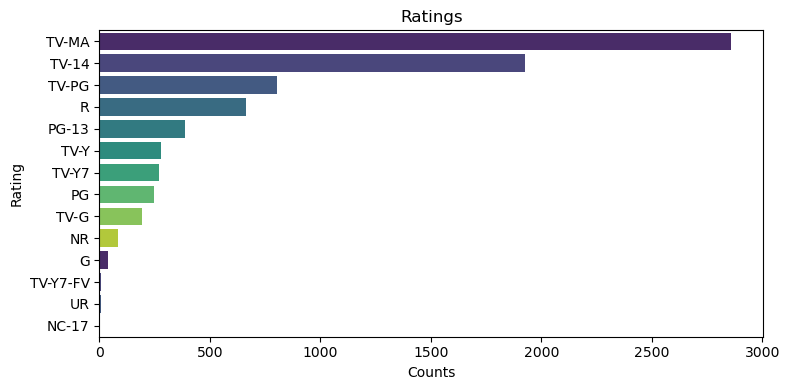

In [25]:
plt.figure(figsize=(8,4))
palette = sns.color_palette("viridis", n_colors=10)
ax = sns.barplot(
    x=Netflix.rating.value_counts(),
    y=Netflix.rating.value_counts().index,
    data=Netflix,
    orient="h",
    palette=palette
    )
plt.title("Ratings")
plt.xlabel("Counts")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

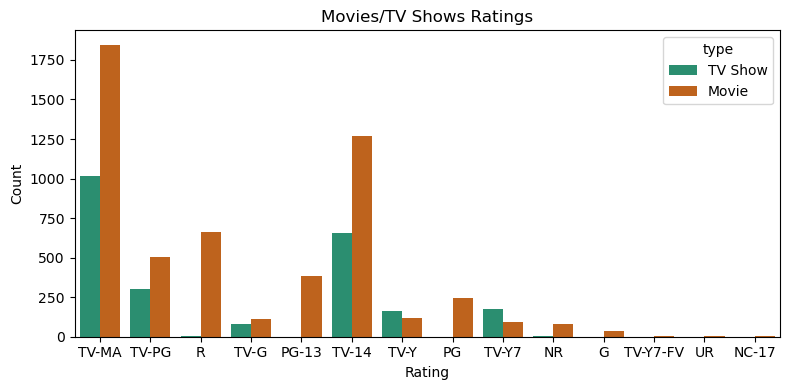

In [26]:
plt.figure(figsize=(8,4))
palette = sns.color_palette("Dark2")
ax = sns.countplot(x='rating',data = Netflix,hue='type',palette=palette
    )
plt.title("Movies/TV Shows Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Highest count is TV-MA,
Second highest is TV-14 and Third highest is TV-PG.

In [27]:
Netflix.country.value_counts()

country
United States                             2546
India                                      923
Unknown                                    505
United Kingdom                             396
Japan                                      224
                                          ... 
Argentina, United States, Mexico             1
Canada, Germany, France, United States       1
Soviet Union, India                          1
Taiwan, China, France, United States         1
France, Belgium, Spain                       1
Name: count, Length: 682, dtype: int64

In [28]:
Netflix.country.value_counts().head(10)

country
United States     2546
India              923
Unknown            505
United Kingdom     396
Japan              224
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Name: count, dtype: int64

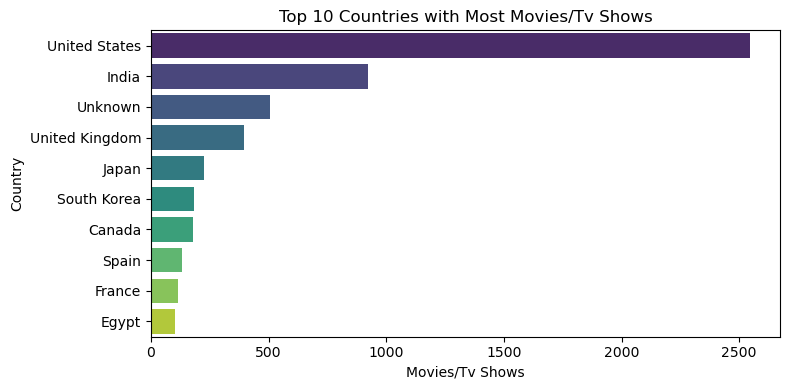

In [29]:
plt.figure(figsize=(8,4))
palette = sns.color_palette("viridis", n_colors=10)
ax = sns.barplot(
    x=Netflix.country.value_counts().head(10),
    y=Netflix.country.value_counts().head(10).index,
    data=Netflix,
    orient="h",
    palette=palette
    )
plt.title("Top 10 Countries with Most Movies/Tv Shows")
plt.xlabel("Movies/Tv Shows")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


# Year wise Count

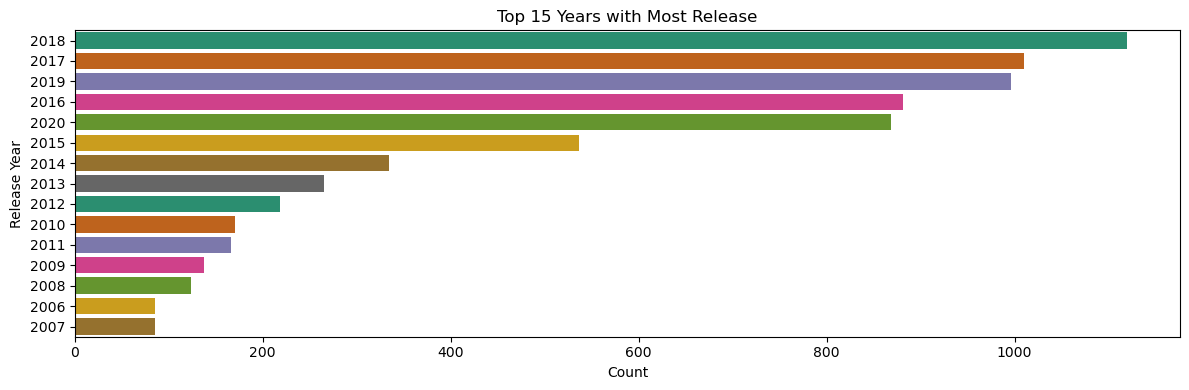

In [30]:
top_15_years = Netflix['release_year'].value_counts().head(15)

plt.figure(figsize=(12, 4))
palette = sns.color_palette("Dark2")
ax = sns.countplot(
    y="release_year",
    data=Netflix,
    order=top_15_years.index,
    palette=palette
)
plt.xlabel("Count")
plt.ylabel("Release Year")
plt.title("Top 15 Years with Most Release")
plt.tight_layout()
plt.show()

Highest Release in 2018 followed by 2017 and 2019

In [31]:
#Top 10 Directors
Netflix.director.value_counts().head(10)

director
No Director               2376
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Martin Scorsese             12
Youssef Chahine             12
Steven Spielberg            10
David Dhawan                 9
Name: count, dtype: int64

In [32]:
Netflix.genres.value_counts().head(10)

genres
Documentaries                                       334
Stand-Up Comedy                                     321
Dramas, International Movies                        320
Comedies, Dramas, International Movies              243
Dramas, Independent Movies, International Movies    215
Kids' TV                                            204
Children & Family Movies                            177
Documentaries, International Movies                 172
Children & Family Movies, Comedies                  169
Comedies, International Movies                      161
Name: count, dtype: int64

# Genres

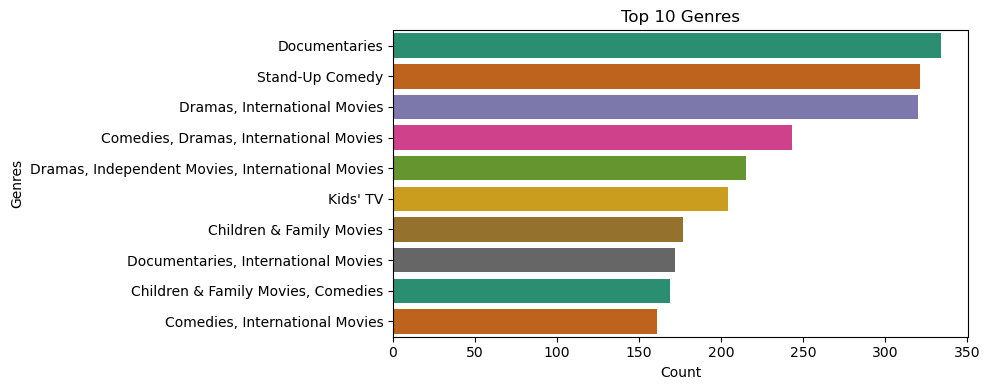

In [33]:
top_10_genres = Netflix['genres'].value_counts().head(10)

plt.figure(figsize=(10, 4))
palette = sns.color_palette("Dark2")
ax = sns.countplot(
    y="genres",
    data=Netflix,
    order=top_10_genres.index,
    palette=palette
)
plt.xlabel("Count")
plt.ylabel("Genres")
plt.title("Top 10 Genres")
plt.tight_layout()
plt.show()

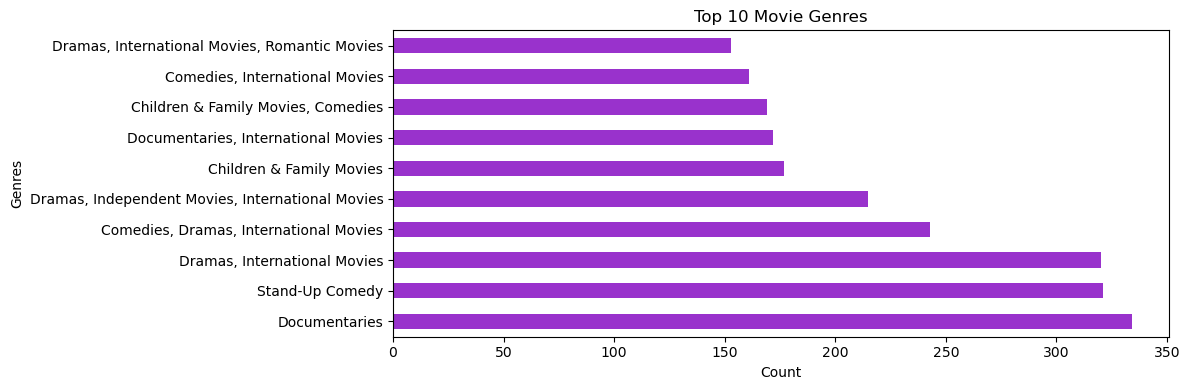

In [34]:
plt.figure(figsize=(12,4))
Netflix[Netflix["type"]=="Movie"]["genres"].value_counts()[:10].plot(kind="barh",color="darkorchid")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.title("Top 10 Movie Genres")
plt.tight_layout()
plt.show()

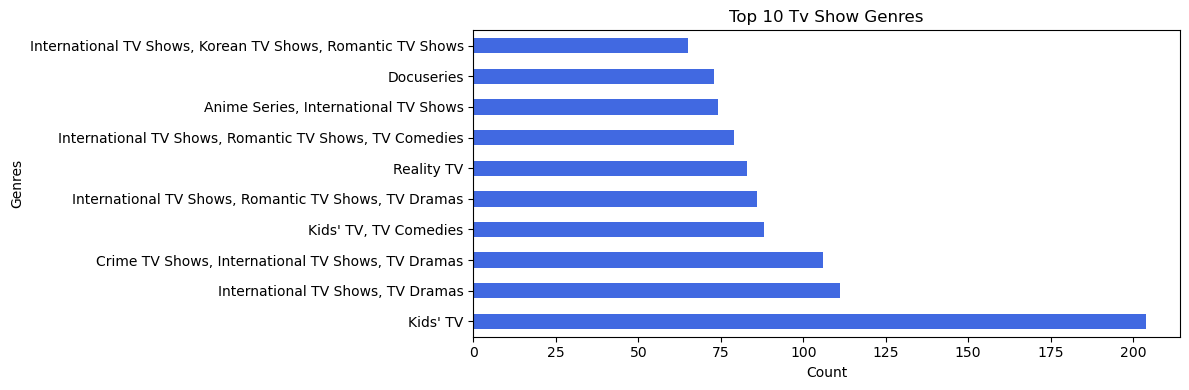

In [35]:
plt.figure(figsize=(12,4))
Netflix[Netflix["type"]=="TV Show"]["genres"].value_counts()[:10].plot(kind="barh",color="royalblue")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.title("Top 10 Tv Show Genres")
plt.tight_layout()
plt.show()

# Movies & TV Shows

In [36]:
Netflix['title']

0                                              3%
1                                            1920
2                                      3 Heroines
3       Blue Mountain State: The Rise of Thadland
4                                  Blue Planet II
                          ...                    
7782                                   Blown Away
7783                                Blue Exorcist
7784                    Blue Is the Warmest Color
7785                                 Blue Jasmine
7786                                     Blue Jay
Name: title, Length: 7770, dtype: object

In [37]:
Movies_Netflix=Netflix.loc[(Netflix['type']=="Movie")]
Movies_Netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
5,s1002,Movie,Blue Ruin,Jeremy Saulnier,"Macon Blair, Devin Ratray, Amy Hargreaves, Kev...","United States, France",25-Feb-19,2013,R,90,"Independent Movies, Thrillers",Bad news from the past unhinges vagabond Dwigh...
6,s1003,Movie,Blue Streak,Les Mayfield,"Martin Lawrence, Luke Wilson, Peter Greene, Da...","Germany, United States",1-Jan-21,1999,PG-13,94,"Action & Adventure, Comedies",A jewel thief returns to his hiding place afte...


In [38]:
Tv_Show_Netflix=Netflix.loc[(Netflix['type']=="TV Show")]
Tv_Show_Netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,No Director,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
4,s1001,TV Show,Blue Planet II,No Director,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...
10,s1007,TV Show,BNA,No Director,"Sumire Morohoshi, Yoshimasa Hosoya, Maria Naga...",Japan,30-Jun-20,2020,TV-14,1,"Anime Series, International TV Shows","Morphed into a raccoon beastman, Michiru seeks..."
15,s1011,TV Show,Bo on the Go!,No Director,"Catherine O'Connor, Andrew Sabiston, Jim Fowler",Canada,21-Mar-19,2007,TV-Y,1,Kids' TV,Staying at home doesn't mean sitting still for...
17,s1013,TV Show,Bob Ross: Beauty Is Everywhere,No Director,Bob Ross,Unknown,1-Jun-16,1991,TV-G,1,TV Shows,"""The Joy of Painting"" host Bob Ross brings his..."


In [39]:
Tv_Show_Netflix.duration.value_counts().tail(10)

duration
6     30
7     19
8     18
9      8
10     5
11     2
12     2
15     2
13     1
16     1
Name: count, dtype: int64

In [40]:
#Show wiyh highest no. of season
longest_shows=Tv_Show_Netflix.loc[(Tv_Show_Netflix['duration']>=13)]
longest_shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
526,s1472,TV Show,COMEDIANS of the world,No Director,"Neal Brennan, Chris D'Elia, Nicole Byer, Nick ...",United States,1-Jan-19,2019,TV-MA,13,"Stand-Up Comedy & Talk Shows, TV Comedies",This global stand-up comedy series features a ...
1711,s2539,TV Show,Grey's Anatomy,No Director,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,9-May-20,2019,TV-14,16,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
3822,s4439,TV Show,NCIS,No Director,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,1-Jul-18,2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS – the Nav...
5460,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada",5-Jun-20,2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."


In [41]:
longest_shows.rating.value_counts()

rating
TV-14    3
TV-MA    1
Name: count, dtype: int64

# Release Year

In [42]:
Netflix.release_year.value_counts().head(10)

release_year
2018    1120
2017    1010
2019     996
2016     881
2020     868
2015     536
2014     334
2013     265
2012     218
2010     171
Name: count, dtype: int64

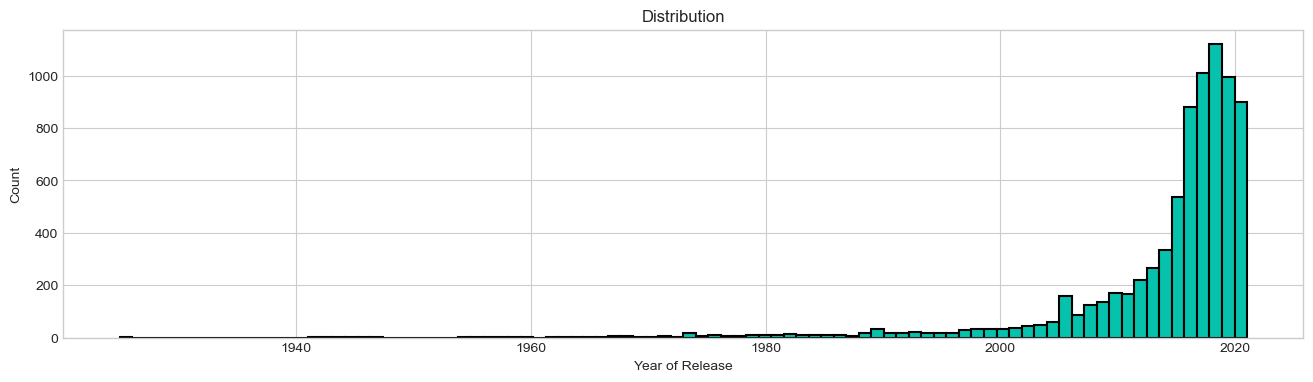

In [43]:
plt.figure(figsize=(16, 4))
plt.style.use('seaborn-whitegrid')
plt.hist(Netflix["release_year"],bins = 90, facecolor = '#06c2ac', edgecolor='black', linewidth=1.5)
plt.title('Distribution')
plt.xlabel('Year of Release')
plt.ylabel('Count')
plt.show()

# Movies & Series in India

In [44]:
Movies_only_in_India = Netflix[(Netflix["type"] == "Movie") & (Netflix["country"] == "India")]["title"]

In [45]:
Movies_only_in_India.count()

852

In [46]:
Movies_only_in_India.unique()

array(['1920', 'BluffMaster!', '3 Idiots', 'Bobby', 'Bobby Jasoos',
       'Bodyguard', 'Bogda', 'Bollywood Calling', 'Bombay Talkies',
       'Boom', 'Boss', 'Break Ke Baad', 'Breaking Free',
       'Brij Mohan Amar Rahe', 'Bucket List', 'Budhia Singh: Born to Run',
       'Bulbbul', 'Bulbul Can Sing', 'Bypass Road', 'C Kkompany',
       'Calendar Girls', 'Candyflip', 'Cappuccino',
       'Care of Kancharapalem', 'Cargo', 'Celluloid Man', 'Chaahat',
       'Chaar\xa0Sahibzaade', 'Chadi Jawani Budhe Nu', 'Chal Bhaag',
       'Chal Dhar Pakad', 'Chal Mere Bhai', 'Chalte Chalte',
       'Chaman Bahaar', 'Chamatkar', 'Chameli', 'Chance Pe Dance',
       'Chashme Baddoor', 'Chashme Buddoor', '6-5=2', 'Chennai Express',
       'Chhota Bheem and the Curse of Damyaan',
       'Chhota Bheem Kungfu Dhamaka', 'Chicken Kokkachi', 'Chillar Party',
       'Chippa', 'Choked: Paisa Bolta Hai', 'Chopsticks', '7 Khoon Maaf',
       'Chup Chup Ke', 'Chupke Chupke', 'CIA: Comrade in America',
       "Cla

In [47]:
TVShows_only_in_India = Netflix[(Netflix["type"] == "TV Show") & (Netflix["country"] == "India")]["title"]

In [48]:
TVShows_only_in_India .count()

71

In [49]:
TVShows_only_in_India .unique()

array(['Chhota Bheem', '7 (Seven)',
       'ChuChu TV Nursery Rhymes & Kids Songs (Hindi)', 'Classic Legends',
       'College Romance', 'Cricket Fever: Mumbai Indians',
       'Darr Sabko Lagta Hai', 'Delhi Crime',
       'Devlok with Devdutt Pattanaik', 'Dharmakshetra',
       'Engineering Girls', 'Fabulous Lives of Bollywood Wives',
       'Fear Files... Har Mod Pe Darr', 'Gabru: Hip Hop Revolution',
       'Gangs of Hassepur', 'GHOUL', 'Girls Hostel', 'Hasmukh', 'Inmates',
       'Jamtara - Sabka Number Ayega', 'Jhansi Ki Rani',
       'Khan: No. 1 Crime Hunter', 'Khelti Hai Zindagi Aankh Micholi',
       'Khotey Sikkey', 'Agent Raghav', 'Ladies Up', 'Leila',
       'Akbar\xa0Birbal', 'Little Singham', 'Little Things',
       'Maharakshak Devi', 'Maharakshak: Aryan', 'Mahi Way',
       'Masaba Masaba', 'Midnight Misadventures With Mallika Dua',
       'Mighty Little Bheem: Diwali',
       'Mighty Little Bheem: Festival of Colors',
       'Mighty Little Bheem: Kite Festival', 'Misma

In [53]:
India = Netflix[Netflix.country == 'India']
India.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
8,s1005,Movie,BluffMaster!,Rohan Sippy,"Abhishek Bachchan, Priyanka Chopra, Riteish De...",India,8-Jan-21,2005,TV-14,129,"Comedies, International Movies, Romantic Movies",When his girlfriend learns the truth about his...
13,s101,Movie,3 Idiots,Rajkumar Hirani,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",India,1-Aug-19,2009,PG-13,164,"Comedies, Dramas, International Movies",While attending one of India's premier college...
21,s1017,Movie,Bobby,Raj Kapoor,"Rishi Kapoor, Dimple Kapadia, Pran, Prem Nath,...",India,31-Dec-19,1973,TV-14,168,"Classic Movies, Dramas, International Movies","Raj, the son of strict, wealthy parents, falls..."
22,s1018,Movie,Bobby Jasoos,Samar Shaikh,"Vidya Balan, Ali Fazal, Supriya Pathak, Tanvi ...",India,31-Dec-20,2014,TV-14,116,"Comedies, Dramas, International Movies",With unlimited determination and zero field ex...


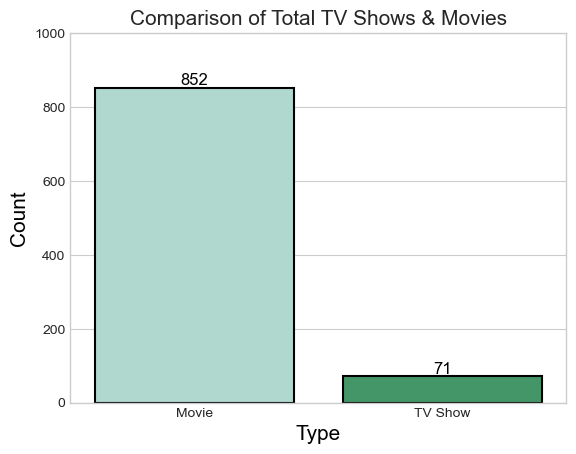

In [101]:
sns.countplot(x='type', data=India, palette=sns.color_palette("BuGn", n_colors=2),
    edgecolor='black', linewidth=1.5)

ax = plt.gca()
y_max = India['type'].value_counts().max() 
ax.set_ylim([0, 1000])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')

plt.title('Comparison of Total TV Shows & Movies', size='15')
plt.xlabel('Type',size='15',color="black")
plt.ylabel('Count',size='15',color="black")
plt.show()


AttributeError: Rectangle.set() got an unexpected keyword argument 'showmeans'

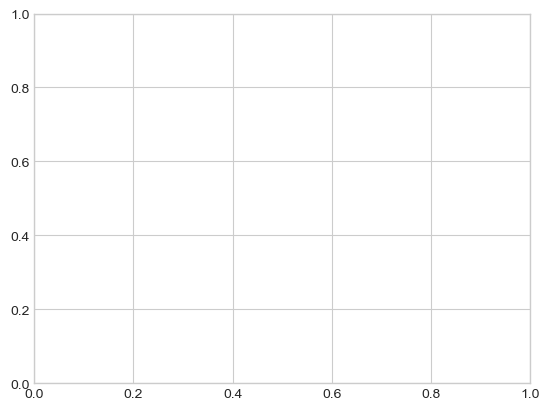

In [99]:
data = India  # Assuming this is your DataFrame

# Create the countplot with dark bar edges and data labels
sns.countplot(
    x='type', data=data, palette=sns.color_palette("BuGn", n_colors=2),
    edgecolor='black', linewidth=1,
    order=data['type'].value_counts().index,  # Ensure correct order
    showmeans=True,  # Show mean values as data labels
)

# Customize plot elements (optional)
plt.title('Comparison of Total TV Shows & Movies', size=15)
plt.xlabel('Type', size=12)
plt.ylabel('Count', size=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing and avoid text clipping

plt.show()



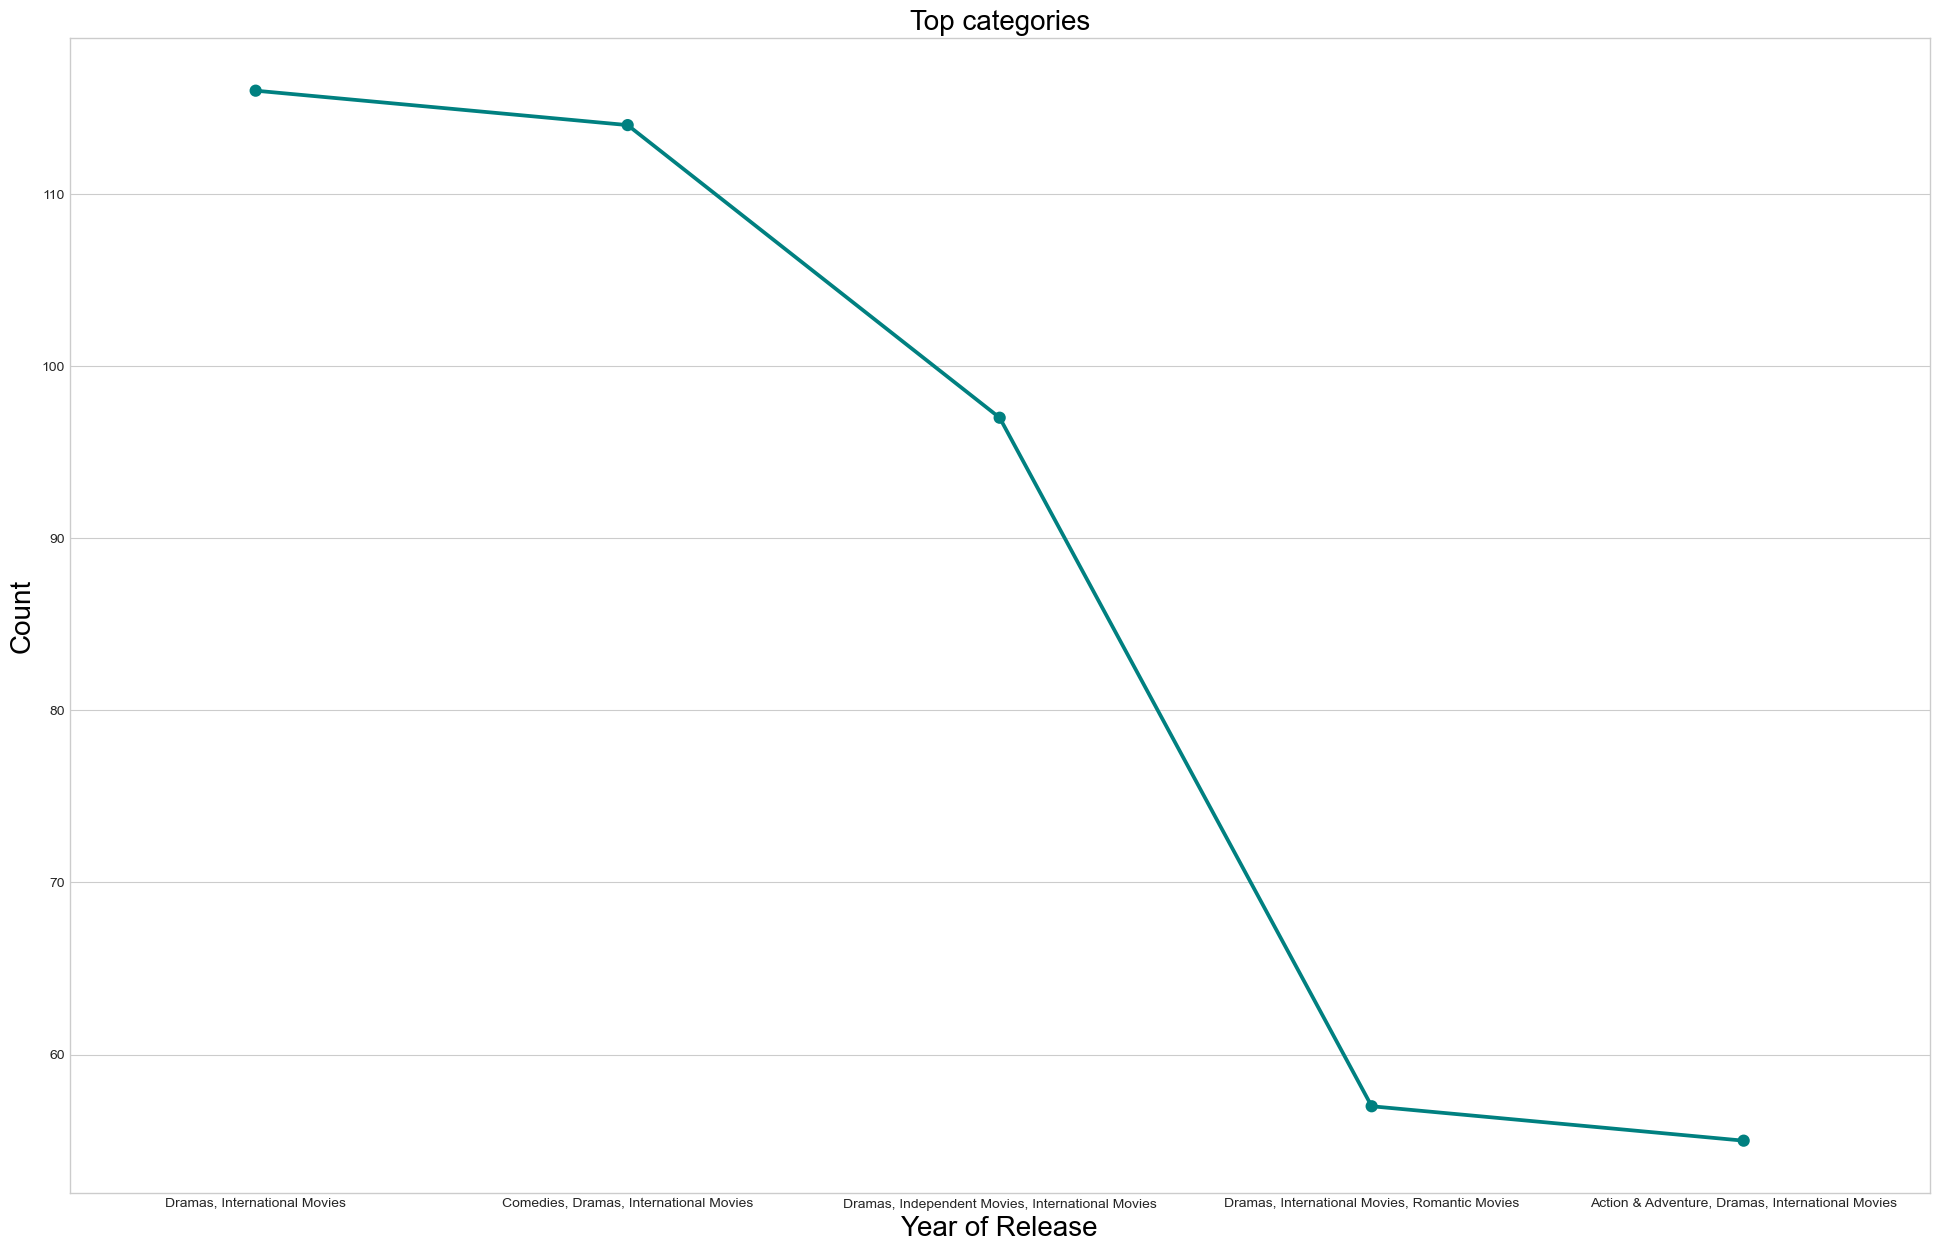

In [80]:
top_genres = India.groupby(['genres'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (24,15)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='genres',y='count',data=top_genres.head(5),color='teal',ax=ax)
plt.title('Top categories',size='20',color="black")
plt.xlabel('Year of Release',size='20',color="black")
plt.ylabel('Count',size='20',color="black")
plt.show()

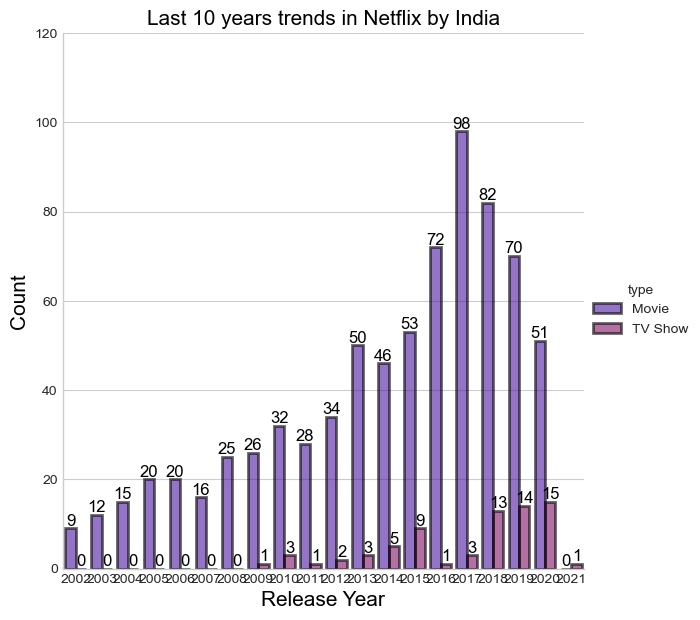

In [109]:
India_recent10 =  India[India.release_year >= 2002]

g = sns.catplot(
    data=India_recent10, kind="count",
    x="release_year", hue="type",
    ci="sd", palette=sns.color_palette("brg"),alpha=.6, height=6,edgecolor='black', linewidth=2)
ax = plt.gca()

y_max = India_recent10['type'].value_counts().max() 
ax.set_ylim([0, 120])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.title('Last 10 years trends in Netflix by India',size='15',color='black')
plt.xlabel('Release Year',size='15',color="black")
plt.ylabel('Count',size='15',color="black")
plt.show()